## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Collin Czernel

Student ID: 

<hr style="border:2px solid gray"> </hr>

## Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [8]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [9]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [10]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [11]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

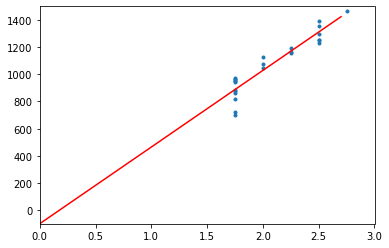

In [12]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

In [9]:
#Defining some basic matrices to use throughout testing

Matrix_A = [[3, 3, 3],
            [2, 2, 2]]

Matrix_B = [[5, 5, 2],
            [4, 3, 5]]

Matrix_C = [[2, 5],
            [3, 7]]

Matrix_D = [[1],
            [3],
            [6]]

Matrix_E = [[6, 8],
            [5, 3],
            [9, 2]]

Matrix_F = [[3, 5, 3],
            [2, 8, 4],
            [4, 2, 1]]

In [11]:
# Going to make a stand alone function for determining the dimensions of matrices so we don't have to do it every time with other functions.

def dimension(matrix):
    dimension = [] #Storing the dimension as a list so its easier to work with
    dimension.append(len(matrix)) # The length of the matrix is the number of rows 
    dimension.append(len(matrix[0])) # The length of the inner list terms (e.g. 3, 3, 3 for matrix A) is the number of columns
    return dimension
dimension(Matrix_A)

# An output of [2, 3] represents a 2x3 matrix

[2, 3]

In [13]:
# Summing two matrices, getting familiar with the rules of matrix rules

def sum_matrix(matrix_one, matrix_two):
    result_matrix = []
    #First need to check that the two matrices are compatible, since the dimension will always be just two digits we can just hardcode it
    if dimension(matrix_one)[0] == dimension(matrix_two)[0] and dimension(matrix_one)[1] == dimension(matrix_two)[1]:
        for i in range(0, len(matrix_one)): # We need to first go over the rows
            x = [] # the rows added to the output
            for j in range(0, len(matrix_one[0])):
                x.append(matrix_one[i][j] + matrix_two[i][j]) #we add in the row[i] and column[j] for each element in the list to our temp x storage
            result_matrix.append(x) # Adding to the result matrix
        return result_matrix
    else:
        print("The two matrixes are not of the same dimension and therefore cannot be summed.")
        return None
        
sum_matrix(Matrix_A, Matrix_B)

[[8, 8, 5], [6, 5, 7]]

In [15]:
# Multiplying two matrices 

def multiply_matrix(matrix_one, matrix_two):
    result_matrix = [] # Define the output matrix
    if dimension(matrix_one)[1] == dimension(matrix_two)[0]: # For multiplication, # of columns of matrix_one has to equal # of rows of matrix_two
        for i in range(0, len(matrix_one)):
            x = [] # Temp list to store multiplication values
            for j in range(0, len(matrix_two[0])): #again looping through the number of rows of matrix two
                product = 0 # now we have to define a stored value, which I learned from looking at Henry's code as I was stuck here. 
                for k in range(0, len(matrix_two)): # Again, Henry's code gave me the inspiration to add another loop here as I was stuck.
                    product = product + matrix_one[i][k] * matrix_two[k][j] # Calculating the product for each value in i, k and k, j
                x.append(product) # Adding our temp values to X and then running the loop again through the previous loop 
            result_matrix.append(x) # Adding our result to the result matrix
        return result_matrix
    else:
        return "ERROR: The two matrices are not compatible for multiplication"

multiply_matrix(Matrix_A, Matrix_E)

[[60, 39], [40, 26]]

In [17]:
# Finding the inverse of a 2x2 matrix
# for matrix [[a, b], [c, d]] its just 1/ad-bc[[d, -b], [-c, a]]
# Using matrix C as the test

def inverse_matrix(matrix):
    if dimension(matrix)[0] == 2 and dimension(matrix)[1] == 2:
        result_matrix = [[],[]]
        a = matrix[0][0]
        b = matrix[0][1]
        c = matrix[1][0]
        d = matrix[1][1]
        val = 1/((a*d) - (b*c)) # 1/determinant of the 2x2 matrix
        result_matrix[0].insert(0, val*d)
        result_matrix[0].insert(1, val*(-1*b))
        result_matrix[1].insert(0, val*(-1*c))
        result_matrix[1].insert(1, val*a)
        return result_matrix
    else:
        return "ERROR: NOT A 2x2 MATRIX INPUT"

print("The inverse of the matrix " + str(Matrix_C) + " is: " + str(inverse_matrix(Matrix_C)))

The inverse of the matrix [[2, 5], [3, 7]] is: [[-7.0, 5.0], [3.0, -2.0]]


In [19]:
# Transposing a matrix

def transpose_matrix(matrix):
    result_matrix = []
    for j in range(0, len(matrix[0])): # Since we are transposing we are looping over the columns first, since these become our new row values
        row = [] # defining a storage list for the following loop
        for i in range(0, len(matrix)): # Now we loop over the rows, which then become the columns
            row.append(matrix[i][j])
        result_matrix.append(row) # Adding all the above to the result matrix, and then repeating for the number of columns
    return result_matrix # Return the result matrix which is our transposed matrix 

transpose_matrix(Matrix_A)

# The input (Matrix_A) was 2x3, the output is 3x2 as expected (3 rows, 2 columns)        

[[3, 2], [3, 2], [3, 2]]

In [21]:
# Part 2: Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares 
# estimate of the linear regression weight vector. Call this function 'fit'.


def fit(file):
    coefficients = [[]] # Loading empty one in case we change data sets 
    data = np.loadtxt(file, delimiter=',') # Using the np from the above case and loading x, y that way
    x = data[:,0:2]
    y = [[data[i,2]] for i in range(0,len(data[:,2]))]
    # now finding the coefficients by looking at the formula (X^T * X)^-1 * X^T * Y
    coefficients = multiply_matrix(inverse_matrix(multiply_matrix(transpose_matrix(x), x)), multiply_matrix(transpose_matrix(x), y))
    return coefficients

fit('lr_data.csv')

[[-99.46431881371245], [564.2038924930494]]

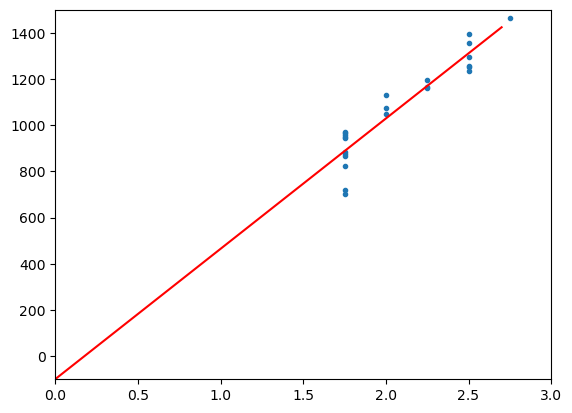

In [37]:
# Create second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function
# Predict. First I am going to verify my method works to re-create the original file (as given above in the example).

def predict_test(file):
    coefficients = fit(file)
    data = np.loadtxt(file, delimiter=',') # Using the np from the above case and loading x, y that way
    x = data[:,0:2]
    y= [[data[i,2]] for i in range(0,len(data[:,2]))]
    ind = np.arange(0,2.8,0.1) # Using the code from the above example essentially to re-create using my own weights found by my previous code. 
    plt.plot(x[:,1],y,'.')
    plt.plot(ind, ind*coefficients[1]+coefficients[0],'r')
    plt.axis([0, 3, -100, 1500])

predict_test('lr_data.csv')

# Which looks good to me. 
    

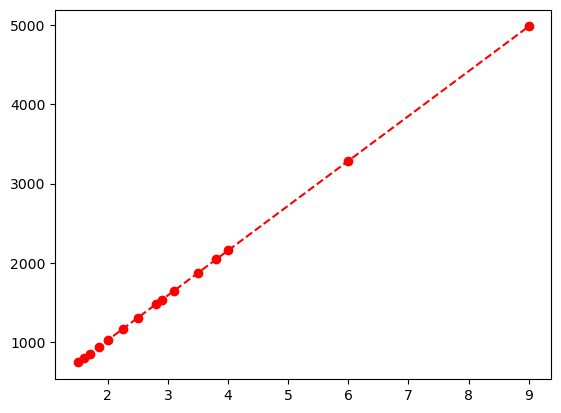

In [111]:
# Now we can use a test data sample which I've uploaded to Github containing different values for X, and this should just be
# y = mx + b to get the predictions. My new data is called "lr_data_predict.csv"

def predict(file):
    data = []
    y = []
    coefficients = [[-99.46431881371245], [564.2038924930494]]
    data = (np.loadtxt(file, delimiter=',')).tolist() # Using the np from the above case and loading x, y that way
    for i in range(0, len(data)):
        result = coefficients[1][0]*data[i] + coefficients[0][0]
        y.append(result)
    plt.plot(data, y, marker='o', linestyle='--', color='r')

predict('lr_data_predict.csv')

<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.

In [ ]:
"""
I was surprised with how difficult parts of this assignment were - specifically, multiplying the matrices. I had to really dive into the 
loops which is an area that I am not super confident on, but after doing some peer learning and YouTube tutorials I managed it. I think that 
the lack of user inputs and correct error handling are concerning, and additionally I would probably add more test cases in the future (e.g. 
have matrices that are randomly generated dimensions/values to be used for test cases and then future validation by hand). I found that the predict 
function was easier than expected (if I understood the assignment correctly), but it was nice to be able to recreate the sample graph provided and 
I'm happy with that. 

I used a lot of reference to Henry's code for the loops, as it was something I was heavily struggling on. I additionally looked at StackOverflow 
and YouTube for tutorials on basic matrix operations. 
"""